In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gtd/globalterrorismdb_0718dist.csv


<h1><center> Global Terrorism Attacks</center></h1>



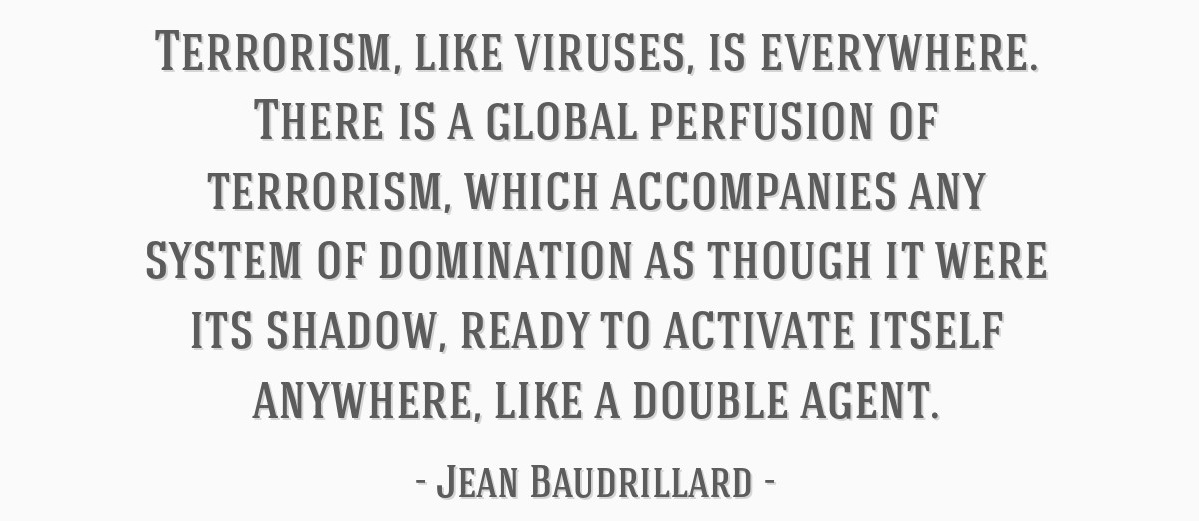

### Executive Summary


**Objectives**
* Determine from the dataset what the trends in global terrorism are from 1970-2017 based on the given variables: 
 * Year
 * Country
 * Region 
 * City
 * Attack Type
 * Weapon Type
 * Target
 * Affiliation
 
**Results and Insights**
* Increase in global terrorist attacks after the year 2000, with the most terrorist attacks happening in 2014
* South Asia and Middle East & North Africa had the most terrorist attacks wiwth a total of 35,000 and 28,445 attacks from 1970-2017
* Countries with the most terrorist attacks were in India (10.5k), Afghanistan (10.1k), and Pakistan (9.8k)
* Cities with the most terrorist attacks were Belfast (961), Baghdad (820), and Kurachi (801)
* Most popular attacks used were bombings/explosions (41.2%), followed by armed assault (26%), and assassinations (12.2%)
* Most popular weapons used were explosives (44%), followed by firearms (36.5%)
* Terrorist targets were mainly citizens & their property, private citizens, and government general
* Largest terrorist organizations are the Taliban, Islamic State of Iraq and the Levant (ISIL), and Shining Path (SL)
* The mostly likely type of terrorist in the United States is someone who would target a business through bombing and are most likely to be an anti-abortion extremeist

### Table of Contents
* [1. Introduction](#chapter1)
* [2. Data Processing](#chapter2)
* [3. Data Exploration](#chapter3)
    * [Number of Terrorist Attacks Each Year](#section_3_1)
    * [Terrorist Attacks By Region](#section_3_2)
    * [Number of Terrorist Attacks By Country](#section_3_3)
    * [Cities With The Most Terrorist Attacks](#section_3_4)
    * [Terrorist Attack Types](#section_3_5)
    * [Terrorist Weapon Types](#section_3_6)
    * [Terrorist Targets](#section_3_7)
    * [Largest Terrorist Groups](#section_3_8)
    * [Most Common US Terrorist Profile](#section_3_9)

### Introduction <a class="anchor" id="chapter1"></a>

According to the FBI, international terrorism is defined as "violent, criminal acts committed by individuals and/or groups who are inspired by, or associated with, designated foreign terrorist organizations or nations (state-sponsored)".

The purpose of this analysis is to discover what trends in the data there are and what it can tell us about global terrorism attacks in terms of where they occur, the types of terrorist attacks, what weapons were used, who the terrorist targets are, and who the largest terrorist groups are.  

The variables of interest in this analysis are:
* Year: Year the attack took place (1970-2017 is the range)
* Country: Country the terrorist attack took place in
* Region: Region the terrorist attack took place in
* City: City the terrorist attack took place in
* Attack Type: How the terrorist attacked the victim
* Weapon Type: Weapon used by terrorist to attack the victim
* Target: Who the target of this terrorist attack is
* Affiliation: What terrorist group is the terrorist part of

### Data Processing <a class="anchor" id="chapter2"></a>

In [2]:
#Importing packages
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import plotly.express as px
import numpy as np
from wordcloud import WordCloud
from scipy import signal
import plotly.graph_objects as go

In [3]:
#Loading Dataset
data = pd.read_csv('../input/gtd/globalterrorismdb_0718dist.csv',encoding='ISO-8859-1')
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [5]:
#Selecting Columns
data = data[['iyear','country_txt','city','region_txt','attacktype1_txt','weaptype1_txt','targtype1_txt', 'gname']]
data.head()

,iyear,country_txt,city,region_txt,attacktype1_txt,weaptype1_txt,targtype1_txt,gname
0,1970,Dominican Republic,Santo Domingo,Central America & Caribbean,Assassination,Unknown,Private Citizens & Property,MANO-D
1,1970,Mexico,Mexico city,North America,Hostage Taking (Kidnapping),Unknown,Government (Diplomatic),23rd of September Communist League
2,1970,Philippines,Unknown,Southeast Asia,Assassination,Unknown,Journalists & Media,Unknown
3,1970,Greece,Athens,Western Europe,Bombing/Explosion,Explosives,Government (Diplomatic),Unknown
4,1970,Japan,Fukouka,East Asia,Facility/Infrastructure Attack,Incendiary,Government (Diplomatic),Unknown


In [6]:
#Renaming Columns
data=data.rename(columns = {'iyear':'Year','country_txt':'Country','city':'City','region_txt':'Region','attacktype1_txt':'Attack_Type','weaptype1_txt':'Weapon_Type',
                            'targtype1_txt':'Target_Type','gname':'Affiliation'})
data.head()

,Year,Country,City,Region,Attack_Type,Weapon_Type,Target_Type,Affiliation
0,1970,Dominican Republic,Santo Domingo,Central America & Caribbean,Assassination,Unknown,Private Citizens & Property,MANO-D
1,1970,Mexico,Mexico city,North America,Hostage Taking (Kidnapping),Unknown,Government (Diplomatic),23rd of September Communist League
2,1970,Philippines,Unknown,Southeast Asia,Assassination,Unknown,Journalists & Media,Unknown
3,1970,Greece,Athens,Western Europe,Bombing/Explosion,Explosives,Government (Diplomatic),Unknown
4,1970,Japan,Fukouka,East Asia,Facility/Infrastructure Attack,Incendiary,Government (Diplomatic),Unknown


In [7]:
#Dropping duplicate rows and keeping the first duplicate row
data = data.drop_duplicates(keep='first')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128545 entries, 0 to 181690
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Year         128545 non-null  int64 
 1   Country      128545 non-null  object
 2   City         128315 non-null  object
 3   Region       128545 non-null  object
 4   Attack_Type  128545 non-null  object
 5   Weapon_Type  128545 non-null  object
 6   Target_Type  128545 non-null  object
 7   Affiliation  128545 non-null  object
dtypes: int64(1), object(7)
memory usage: 8.8+ MB


<Figure size 720x432 with 0 Axes>

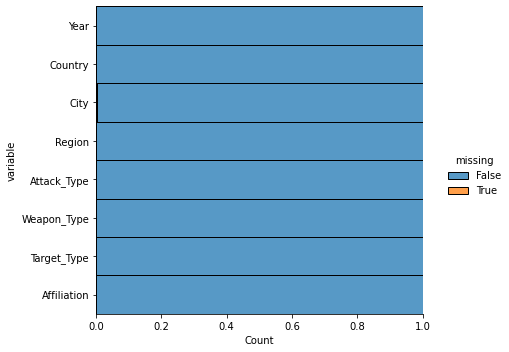

In [8]:
#Determining Which Variables Have Missing Values
plt.figure(figsize=(10,6))
sns.displot(
    data=data.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)

No missing variables.

### Data Exploration <a class="anchor" id="chapter3"></a>

#### Number Of Terrorist Attacks Each Year <a class="anchor" id="section_3_1"></a>

In [9]:
#Making a new column called YearCount which is the sum of the number of terrorist attacks for each year and additing it to dataframe
data['YearCount'] = data.Year.groupby(data.Year).transform('count')

#Creating new Dataframe to get only Year and YearCount and dropping duplicates from Year
data1 = data.copy()
data2 = data1[['Year','YearCount']]
data3 = data2.drop_duplicates(keep='first')

#Line Graph
fig = px.line(data3, x="Year", y="YearCount", title='Number of Terrorist Attacks Each Year')
fig.update_xaxes(range = [1970,2017])
fig.show()

This line plot shows us that in there is a huge increase in terrorism during the 2000's as opposed to 1970-2000. 2014 had the most terrorist attacks. The biggest increase in terrorist attacks is from from 2010-2014 and that after 2014, the number of terrorist attacks is decreasing. Now we will take a look at which regions had the most attacks throughout the years.

#### Terrorist Attacks By Region  <a class="anchor" id="section_3_2"></a>

In [10]:
#Making a new column called RegionCount which only has value of 1 for each row - this way histogram will sum up values correctly
data['RegionCount'] = 1

#Histogram
fig = px.histogram(data, x="Region", y="RegionCount", color="Region", 
                   title="Terrorist Attacks By Region", labels=dict(RegionCount = "Count"),
                   hover_data=data).update_xaxes(categoryorder = "total descending")
fig.show()

Here we see that South Asia, the Middle East & North Africa, Sub-Saharan-Africa, and South America have the most terrorism attacks. There is also a trend that the Western countries tend to have less terrorism attacks than the 3rd world countries. It is also not surprising to see that regions like South Asia, Middle East, Africa, and South America are the top ranking in terms of terrorism attacks due to the large disparities in wealth, differences in religions, as well as territorial disputes over oil. We will now delve deeper into seeing which countries had the most terrorist attacks.

#### Number of Terrorist Attacks By Country <a class="anchor" id="section_3_3"></a>

In [11]:
data['Country'].value_counts().head(10)

India             10499
Afghanistan       10137
Pakistan           9835
Iraq               9525
Colombia           6446
Philippines        6156
Peru               3587
United Kingdom     3500
Turkey             3170
Nigeria            3128
Name: Country, dtype: int64

In [12]:
#World Map
geo=pd.DataFrame({'Country': data['Country'].value_counts().index,
                   'Number_of_Attacks': data['Country'].value_counts().values})

fig = px.choropleth(geo, locations="Country", 
                    locationmode="country names", color="Number_of_Attacks", 
                    hover_name="Country", range_color=[1, 1000], 
                    color_continuous_scale="blues", 
                    title='Number of Terrorist Attacks by Country')
fig.update(layout_coloraxis_showscale=True)
fig.show()

This geographic map depicts the countries with the most terrorist attacks. From this map we can see that the areas with the highest terrorist attacks are in dark blue, while the areas with the least are in white. This map verifies what we already discovered, that the countries with the most attacks tend to be those in South Asia, Middle East & North Africa, and South America.

### Cities With The Most Terrorist Attacks <a class="anchor" id="section_3_4"></a>

In [13]:
data.City.value_counts().head(15)

Unknown         5540
Belfast          961
Baghdad          820
Karachi          801
Lima             704
San Salvador     630
Athens           625
Santiago         603
Bogota           581
Beirut           563
Istanbul         558
Mogadishu        518
Mosul            467
Srinagar         440
Paris            434
Name: City, dtype: int64

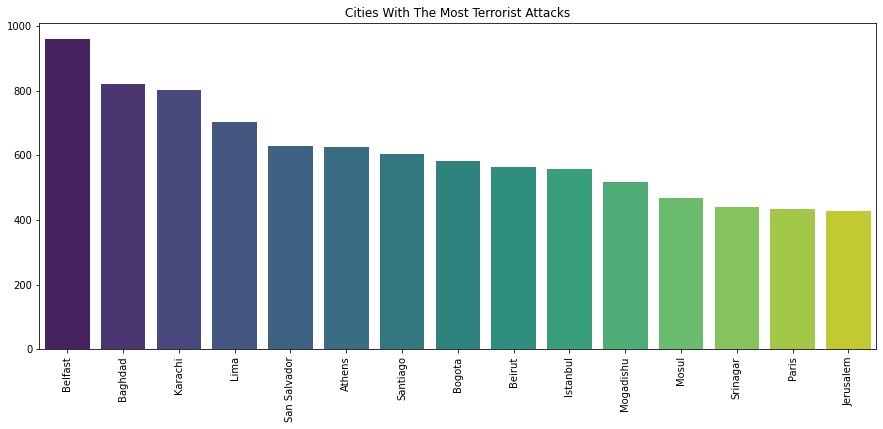

In [14]:
#Creating new dataframe without Unknown Category
filtered = data[data['City'] != 'Unknown']

#Barplot
plt.subplots(figsize=(15,6))
sns.barplot(filtered['City'].value_counts().head(15).index, filtered['City'].value_counts().head(15).values, 
            palette = "viridis")
plt.xticks(rotation=90)
plt.title('Cities With The Most Terrorist Attacks')
plt.show()

From the barplot, we see that the top 5 cities with terrorism attacks are Belfast, Baghdad, Karachi, Lima, and San Salvador. It is surprising to see that Belfast, Ireland is the top city for terrorist attacks since according to the interactive map we just created, Ireland isn't one of the countries with the highest terrorist attacks. 

#### Terrorist Attack Types <a class="anchor" id="section_3_5"></a>

In [15]:
#Making a new column called AttackCount which is the sum of each type of terrorist attack and adding it to dataframe
data['AttackCount'] = data.Attack_Type.groupby(data.Attack_Type).transform('count')

#Creating new Dataframe to get only Attack Type and AttackCount and dropping duplicates from Attack Type
data1 = data.copy()
data2 = data1[['Attack_Type','AttackCount']]
data3 = data2.drop_duplicates(keep='first')

#Pie Chart
fig = px.pie(data3, values="AttackCount",
             names="Attack_Type",title='Terrorist Attack Types',
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

From the pie chart, the most common type of terrorist weapons used are Bombing/Explosions, followed by Armed Assault, and Assassinations. The reason that bombings/explosions are the most common type of terrorist attack is likely due to how the information to make bombs is easily available, it is easier to use a bomb or explosive than attempt things like armed assault or assassinations, as well as the fact that there aren't things like background checks when it comes to getting a bomb as opposed to trying to get a firearm or get close enough to assassinate someone important. 

#### Terrorist Weapon Types <a class="anchor" id="section_3_6"></a>

In [16]:
#Making a new column called WeaponCount which is the sum of each type of weapon and adding it to dataframe
data['WeaponCount'] = data.Weapon_Type.groupby(data.Weapon_Type).transform('count')

#Creating new Dataframe to get only Weapon Type and WeaponCount and dropping duplicates from Weapon Type
data1 = data.copy()
data2 = data1[['Weapon_Type','WeaponCount']]
data3 = data2.drop_duplicates(keep='first')

#Creating Donut Chart
labels = data3['Weapon_Type'].unique()
values = data3['WeaponCount']
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(
    title_text="Terrorist Weapon Types")
fig.show()

From the donut chart, we see that the most common types of weapons used by terrorists are explosives and firearms. This also followed the trend from above where most attack types used bombs/explosives. Firearms are also easily obtainable which makes sense why it is a favorite weapon of choice for terrorists.

#### Terrorist Targets <a class="anchor" id="section_3_7"></a>

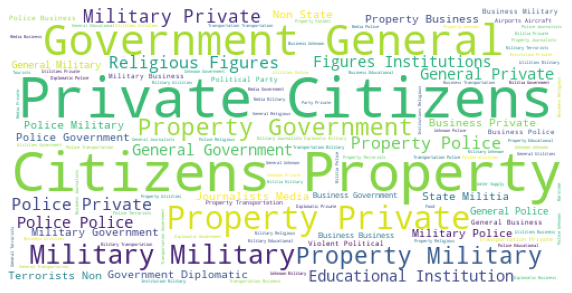

In [17]:
#Word Cloud
Targets=data.Target_Type.dropna(False)
plt.subplots(figsize=(10,10))
wordcloud= WordCloud(background_color='white', width=500, height = 250).generate(' '.join(Targets))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

From the Word Cloud we see that the most common target types are Citizens & Private Property, Private Citizens, and Government General. This is likely due to how terrorism attacks tend to be against individuals related to certain groups as opposed to just the general population. We will now look at what the largest terrorist groups are.

#### Largest Terrorist Groups <a class="anchor" id="section_3_8"></a>

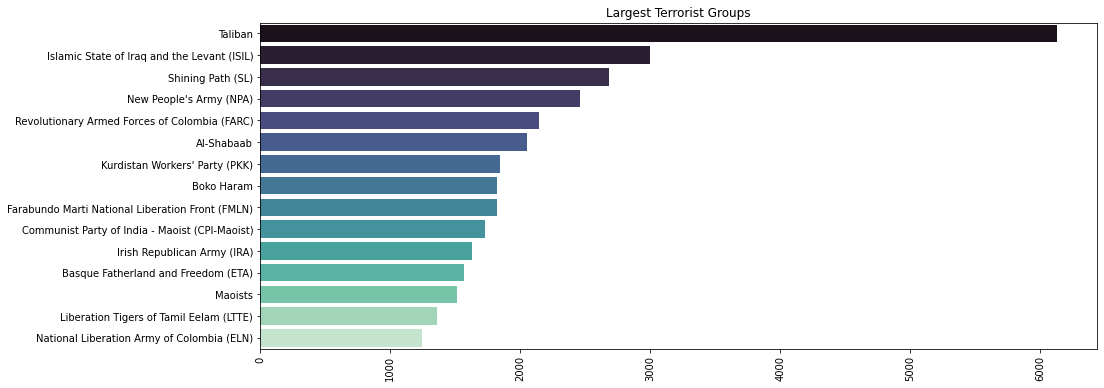

In [18]:
#Creating new dataframe without Unknown Category
filtered = data[data['Affiliation'] != 'Unknown']

#Horizontal Barplot
plt.subplots(figsize=(15,6))
sns.barplot(filtered['Affiliation'].value_counts().head(15).values, filtered['Affiliation'].value_counts().head(15).index, 
            palette = "mako")
plt.xticks(rotation=90)
plt.title('Largest Terrorist Groups')
plt.show()

From the horizontal barplot, we can see that the 5 largest terrorist groups are the Taliban, ISIL, Shining Path, Al-Shabaab, and New People's Army (NPA). The first 4 groups aren't surprising since they are all in the Middle East & North Africa areas, but New People's Army is the armed wing of the Communist Party in the Philippines.  

#### Most Common US Terrorist Profile <a class="anchor" id="section_3_9"></a>

The purpose of this part of the analysis is to just to take a general look at what is the most likely profile of a US terrorist. I am interested in this because I am a US Citizen.

In [19]:
#Subsetting data to only include entries for United States
US = data[data['Country'] =='United States']

#Removing Unknown in Affiliation
filtered = US[US['Affiliation'] != 'Unknown']

#Profile
print("Year With The Most Attacks:",US['Year'].value_counts().idxmax())

print("Most Common Attack Type:",US['Attack_Type'].value_counts().idxmax())

print("Most Common Weapon Type:",US['Weapon_Type'].value_counts().idxmax())

print("Most Common Target Type:",US['Target_Type'].value_counts().idxmax())

print('Terrorist Group with Highest Number Of Terror Attacks:', filtered['Affiliation'].value_counts().idxmax())

Year With The Most Attacks: 1970
Most Common Attack Type: Bombing/Explosion
Most Common Weapon Type: Explosives
Most Common Target Type: Business
Terrorist Group with Highest Number Of Terror Attacks: Anti-Abortion extremists


The year with the most attacks is 1970, which is also the year that Roe vs. Wade lawsuit was filed and the Texas law was declared unconstitutional due to violating the right to privacy. This debate over Roe vs. Wade is likely the major cause of the why there were so many terrorist attacks in 1970.

Bombings/explosives being the most used attack of choice as well as weapon of choice in the US follows the trend of bombings/explosives being the most common attack type for terrorism in other countries also.

The most common target type in the US being businesses is likely due to how company lobbying holds alot of sway in terms of influencing politicians and the politics that are enacted which benefit companies at the expense of citizens.

It is interesting that the anti-abortion extremists are the biggest terrorist group instead of a white nationalist group or a gang because on social media and the news, it's usually always about a gang or white national group publicly causing problems. However, abortion is a very touchy subject in America due to the pro-life side (more heavily religious group) vs. the pro-choice side (tends to be more atheist).